In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
import joblib

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

In [46]:
all_data = pd.read_csv("RV2_UPP_IIR_SIPIA.csv")
print(all_data.head())

                        Date  Latitude  Longitude  Altitude   NO2  PM2.5  O3  \
0  2023-02-22 09:15:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
1  2023-02-22 09:35:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
2  2023-02-16 17:15:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
3  2023-02-16 17:35:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
4  2023-10-24 10:35:00+00:00   46.5592  15.656191     270.0  68.0   19.0   0   

   PM10  
0  88.0  
1  88.0  
2  86.0  
3  86.0  
4  74.0  


In [47]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data.sort_values(by='Date', inplace=True)
features = ['Latitude', 'Longitude', 'Altitude', 'NO2', 'PM2.5', 'O3', 'PM10']
all_data = all_data[['Date'] + features]

In [49]:
missing_values = all_data.isnull().sum()

print(missing_values)

Date           0
Latitude       0
Longitude      0
Altitude       0
NO2          286
PM2.5        465
O3             0
PM10         466
dtype: int64


In [50]:
# Assuming 'all_data' is your DataFrame
measurements_by_day = all_data.groupby(all_data['Date'].dt.date).size()

# Print the result
print(measurements_by_day)


Date
2023-02-15     9
2023-02-16    48
2023-02-17    48
2023-02-18    48
2023-02-19    48
              ..
2023-12-07    24
2023-12-08    24
2023-12-09    24
2023-12-10    24
2023-12-11     9
Length: 211, dtype: int64


In [51]:
all_data = all_data.copy()
columns_with_missing_values = all_data.columns[all_data.isnull().any()]
print(columns_with_missing_values)
columns_with_missing_values = columns_with_missing_values.tolist()
missing_df = all_data[all_data.isnull().any(axis=1)]
complete_df = all_data.dropna()


Index(['NO2', 'PM2.5', 'PM10'], dtype='object')


In [52]:
for column in columns_with_missing_values:
    X = complete_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    y = complete_df[column]
    
    model = RandomForestRegressor()
    model.fit(X, y)
    
    missing_X = missing_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    predictions = model.predict(missing_X)
    
    all_data.loc[missing_df.index, column] = predictions

missing_values = all_data.isnull().sum()

print(missing_values)

multivariate_series = np.array(all_data[features].values)

Date         0
Latitude     0
Longitude    0
Altitude     0
NO2          0
PM2.5        0
O3           0
PM10         0
dtype: int64


In [53]:
def plot_numeric_data(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [33]:
print(all_data["Latitude"].describe())
print(all_data["Latitude"].value_counts())
print(all_data["Longitude"].value_counts())
print(all_data["O3"].value_counts())
print(all_data["O3"])

count    5.625000e+03
mean     4.655920e+01
std      4.384438e-12
min      4.655920e+01
25%      4.655920e+01
50%      4.655920e+01
75%      4.655920e+01
max      4.655920e+01
Name: Latitude, dtype: float64
Latitude
46.5592    5625
Name: count, dtype: int64
Longitude
15.656191    5625
Name: count, dtype: int64
O3
0    5625
Name: count, dtype: int64
72      0
78      0
79      0
153     0
154     0
       ..
1880    0
2633    0
3067    0
3548    0
3844    0
Name: O3, Length: 5625, dtype: int64


c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

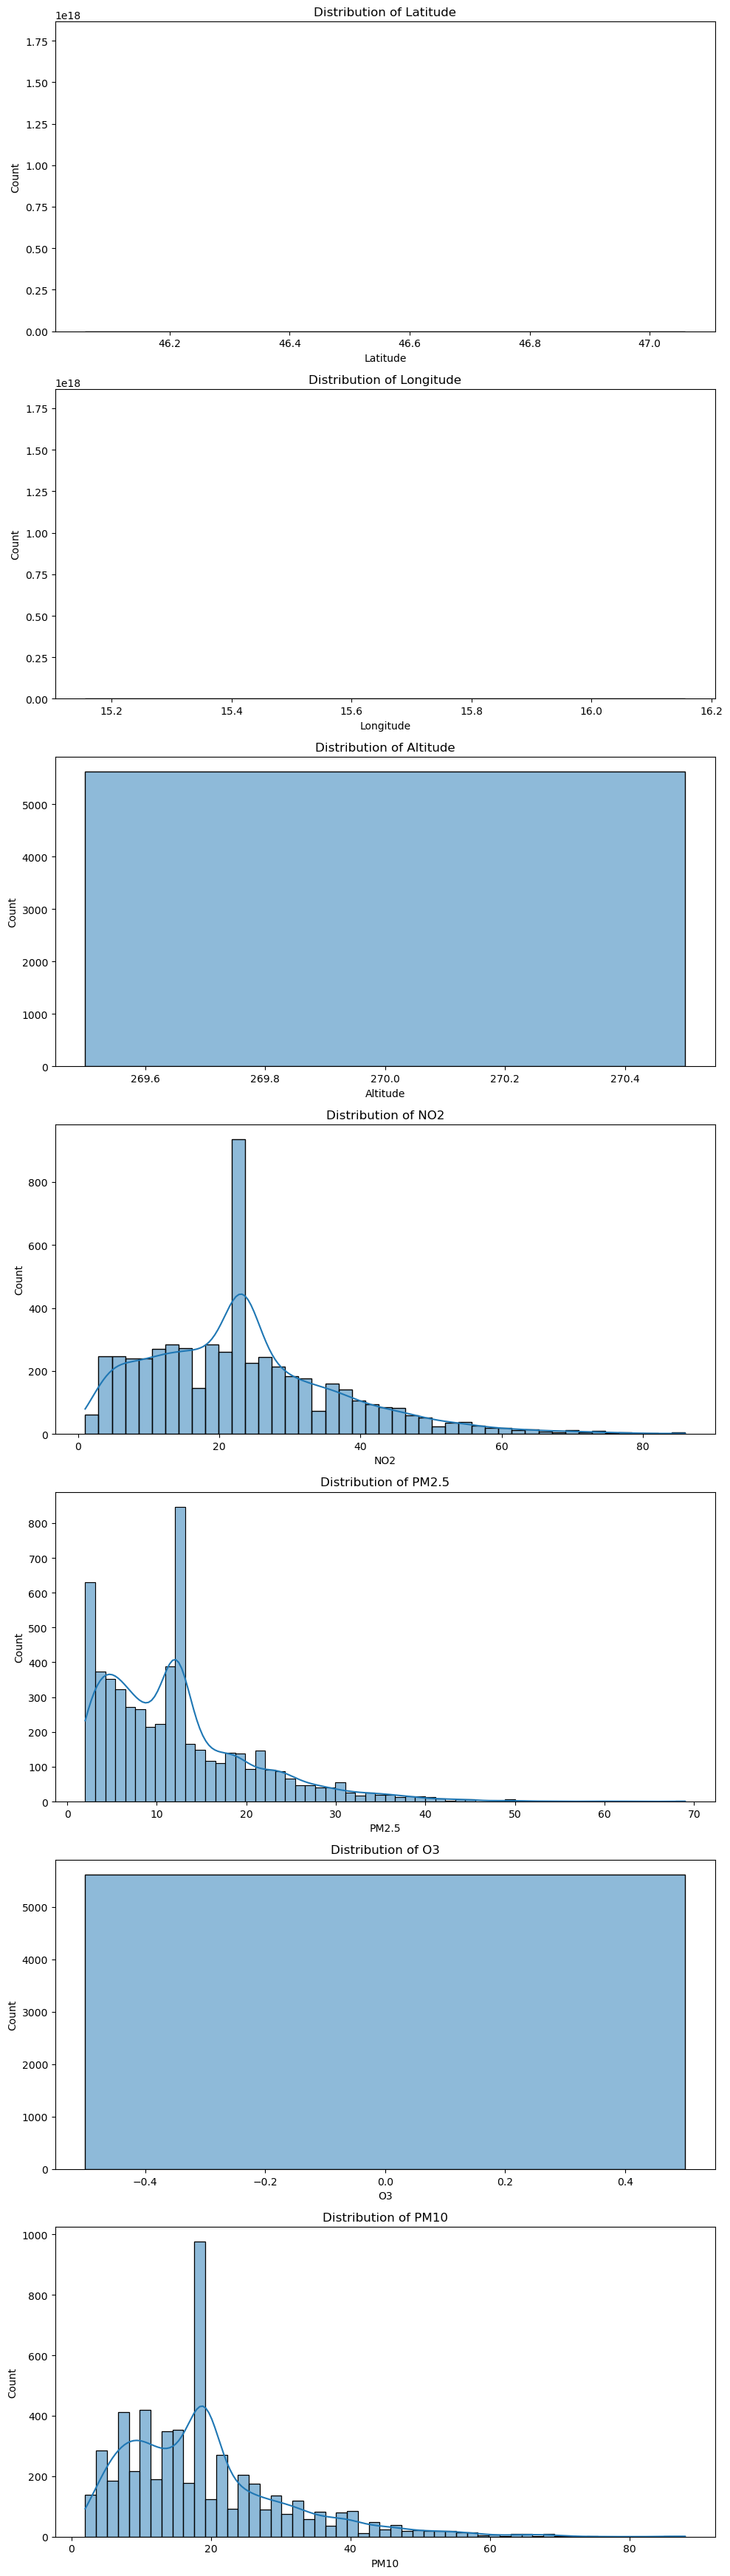

In [54]:
plot_numeric_data(all_data)

In [35]:
def printSkew():
  skewness_info = []
  for column in all_data.columns[1:]:
      skew = all_data[column].skew()
      skewness_info.append((column, skew))

  # Pretvori seznam v DataFrame za lažje prikazovanje
  skewness_df = pd.DataFrame(skewness_info, columns=['Column Name', 'Skewness'])

  # Izpišite oznako stolpca in njegovo poševnost
  print(skewness_df)

printSkew()

  Column Name  Skewness
0    Latitude  0.000000
1   Longitude  0.000000
2    Altitude  0.000000
3         NO2  0.935955
4       PM2.5  1.455173
5          O3  0.000000


In [55]:
# Right skeewed data ["NO2", "PM2.5"]

right_skew_columns = ["NO2", "PM2.5"]
for col in right_skew_columns:
    all_data[col] = np.log(all_data[col]+1 )

  Column Name  Skewness
0    Latitude  0.000000
1   Longitude  0.000000
2    Altitude  0.000000
3         NO2 -0.761620
4       PM2.5 -0.159025
5          O3  0.000000
6        PM10  1.351443


c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

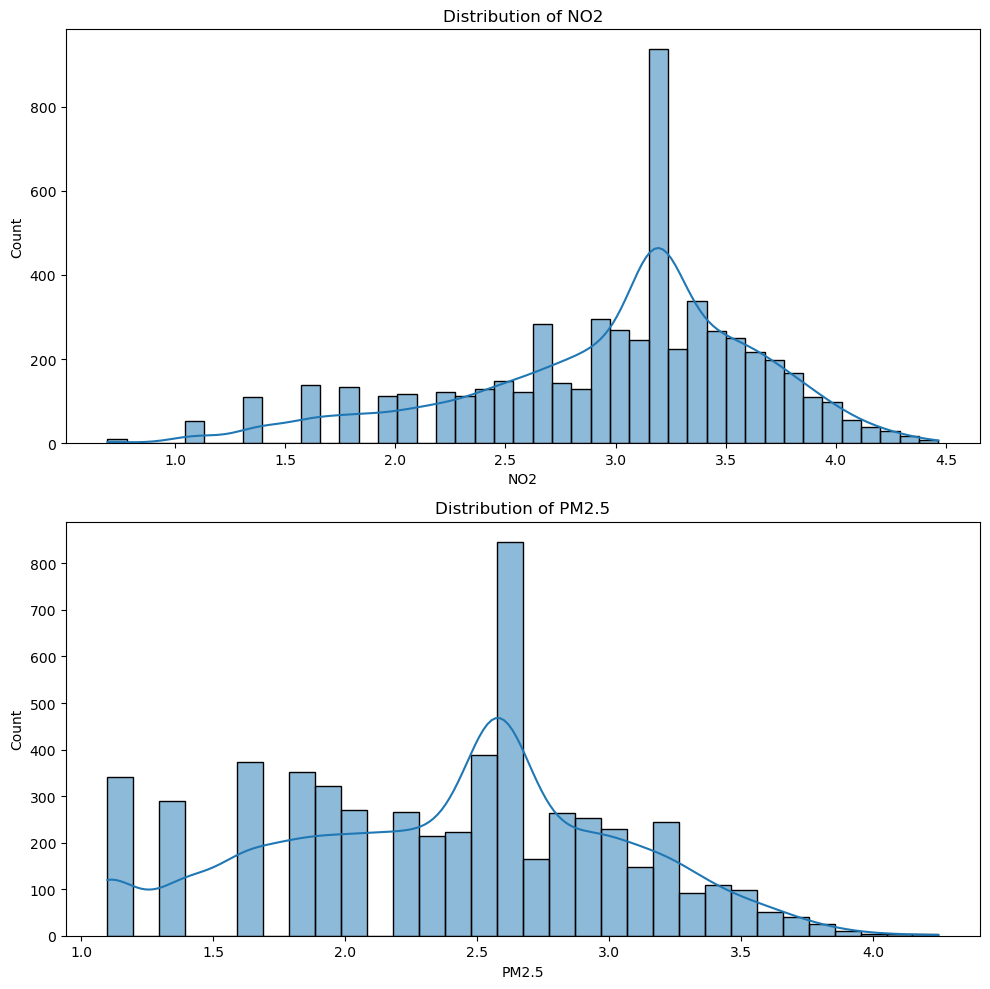

In [56]:
printSkew()
plot_numeric_data(all_data[['NO2', 'PM2.5']])

In [45]:
# Data  scaler 
standard_scaler = StandardScaler()


# Nove Značilnice

In [67]:
#engeeniring features
all_data['NO2_PM2.5_Interact'] = all_data['NO2'] * all_data['PM2.5']


In [60]:
all_data['Day'] = all_data['Date'].dt.day
all_data['Month'] = all_data['Date'].dt.month
all_data['Hour'] = all_data['Date'].dt.hour
all_data['Day_of_Week'] = all_data['Date'].dt.dayofweek



In [62]:
all_data["Day_of_Week"]

72      2
78      2
79      2
153     2
154     2
       ..
1880    0
2633    0
3067    0
3548    0
3844    0
Name: Day_of_Week, Length: 5625, dtype: int32

In [61]:
all_data['Hour_NO2_Interaction'] = all_data['Hour'] * all_data['NO2']
all_data['Hour_PM2.5_Interaction'] = all_data['Hour'] * all_data['PM2.5']

In [68]:
all_data.head()

,Date,Latitude,Longitude,Altitude,NO2,PM2.5,O3,PM10,Day,Month,Hour,Day_of_Week,Hour_NO2_Interaction,Hour_PM2.5_Interaction,NO2_PM2.5_Interact
72,2023-02-15 19:35:00+00:00,46.5592,15.656191,270.0,3.871201,3.871201,0,56.0,15,2,19,2,73.552819,73.552819,14.986197
78,2023-02-15 20:15:00+00:00,46.5592,15.656191,270.0,3.713572,3.912023,0,56.0,15,2,20,2,74.271441,78.240460,14.527579
79,2023-02-15 20:35:00+00:00,46.5592,15.656191,270.0,3.713572,3.912023,0,56.0,15,2,20,2,74.271441,78.240460,14.527579
153,2023-02-15 21:15:00+00:00,46.5592,15.656191,270.0,3.465736,3.806662,0,49.0,15,2,21,2,72.780454,79.939912,13.192887
154,2023-02-15 21:35:00+00:00,46.5592,15.656191,270.0,3.465736,3.806662,0,49.0,15,2,21,2,72.780454,79.939912,13.192887


# Information Gain

In [75]:
target = all_data['PM10']
target_feature = all_data.drop('Date', axis=1)

info_gains = mutual_info_regression(target_feature.drop('PM10', axis=1), target)

info_gain_df = pd.DataFrame({'Feature': target_feature.columns.drop('PM10'), 'Information_Gain': info_gains})
info_gain_df = info_gain_df.sort_values(by='Information_Gain', ascending=False)

print(info_gain_df)

threshold = 0.1
selected_features = info_gain_df[info_gain_df['Information_Gain'] >= threshold]['Feature']

print("Selected Features:")
print(selected_features)

                   Feature  Information_Gain
4                    PM2.5          1.389355
12      NO2_PM2.5_Interact          1.241364
11  Hour_PM2.5_Interaction          0.779762
3                      NO2          0.589534
10    Hour_NO2_Interaction          0.404463
7                    Month          0.188096
6                      Day          0.176049
8                     Hour          0.061005
9              Day_of_Week          0.053809
2                 Altitude          0.015635
5                       O3          0.008284
0                 Latitude          0.001244
1                Longitude          0.001067
Selected Features:
4                      PM2.5
12        NO2_PM2.5_Interact
11    Hour_PM2.5_Interaction
3                        NO2
10      Hour_NO2_Interaction
7                      Month
6                        Day
Name: Feature, dtype: object
